<a href="https://colab.research.google.com/github/camilamenezzzes/Analise-Dataset-Pima/blob/main/An%C3%A1lise_do_Dataset_Pima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Pima Indians Diabetes Database

# Regressão Logística (supervisionado)

# Importa as bibliotecas necessárias para análise de dados, visualização e modelagem.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importa módulos do scikit-learn para divisão de dados, pré-processamento, pipeline,
# regressão logística e métricas de avaliação.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score

# **Coleta / Limpeza / Leitura / Análise Exploratória de Dados**

In [ ]:
#Os conjuntos de dados consistem em diversas variáveis ​​preditoras médicas (independentes) e uma variável alvo (dependente), o Desfecho . As variáveis ​​independentes
#incluem o número de gestações que a paciente teve, seu IMC, nível de insulina, idade, entre outras.

#Colunas:

# Pregnancies: Número de vezes que esteve grávida
# Glucose: Concentração de glicose plasmática após 2 horas em um teste oral de tolerância à glicose
# BloodPressure: Pressão arterial diastólica (mm Hg)
# SkinThickness: Espessura da prega cutânea do tríceps (mm)
# Insulin: Insulina sérica de 2 horas (µU/ml)
# BMI: Índice de massa corporal (peso em kg/(altura em m)^2)
# DiabetesPedigree: Histórico de diabetes
# Age: Anos
# Outcome: Variável de classe (0 ou 1): 268 de 768 são 1, os demais são 0.

In [ ]:
# Dataset disponível no Kaggle:
# https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database
# (Baixar e enviar o arquivo student-mat.csv ou student-por.csv)

# Carrega o dataset 'diabetes.csv' em um DataFrame pandas, usando ',' como separador.
# Rerunning this cell will reset the DataFrame 'df' to its initial state.
df = pd.read_csv("/content/diabetes.csv", sep=',')

# Imprime as dimensões (número de linhas e colunas) do DataFrame.
print("Dimensões:", df.shape)

# Exibe as primeiras 5 linhas do DataFrame para uma prévia dos dados.
df.head(5)

Dimensões: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Exibe informações sobre o DataFrame, incluindo o tipo de dados de cada coluna e a contagem de valores não nulos.
df.info()

# Verifica se há valores nulos em cada coluna e exibe o resultado (True se houver nulo, False caso contrário).
df.isnull().any()
# df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,0
Pregnancies,False
Glucose,False
BloodPressure,False
SkinThickness,False
Insulin,False
BMI,False
DiabetesPedigreeFunction,False
Age,False
Outcome,False


In [ ]:
# procura por dados duplicados
df.duplicated().value_counts()

,count
False,768


In [ ]:
df.describe().T # somente dados númericos

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df.describe(include="all").T # inclue dados categóricos (qualitativos)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


#**Visualização dos Dados**

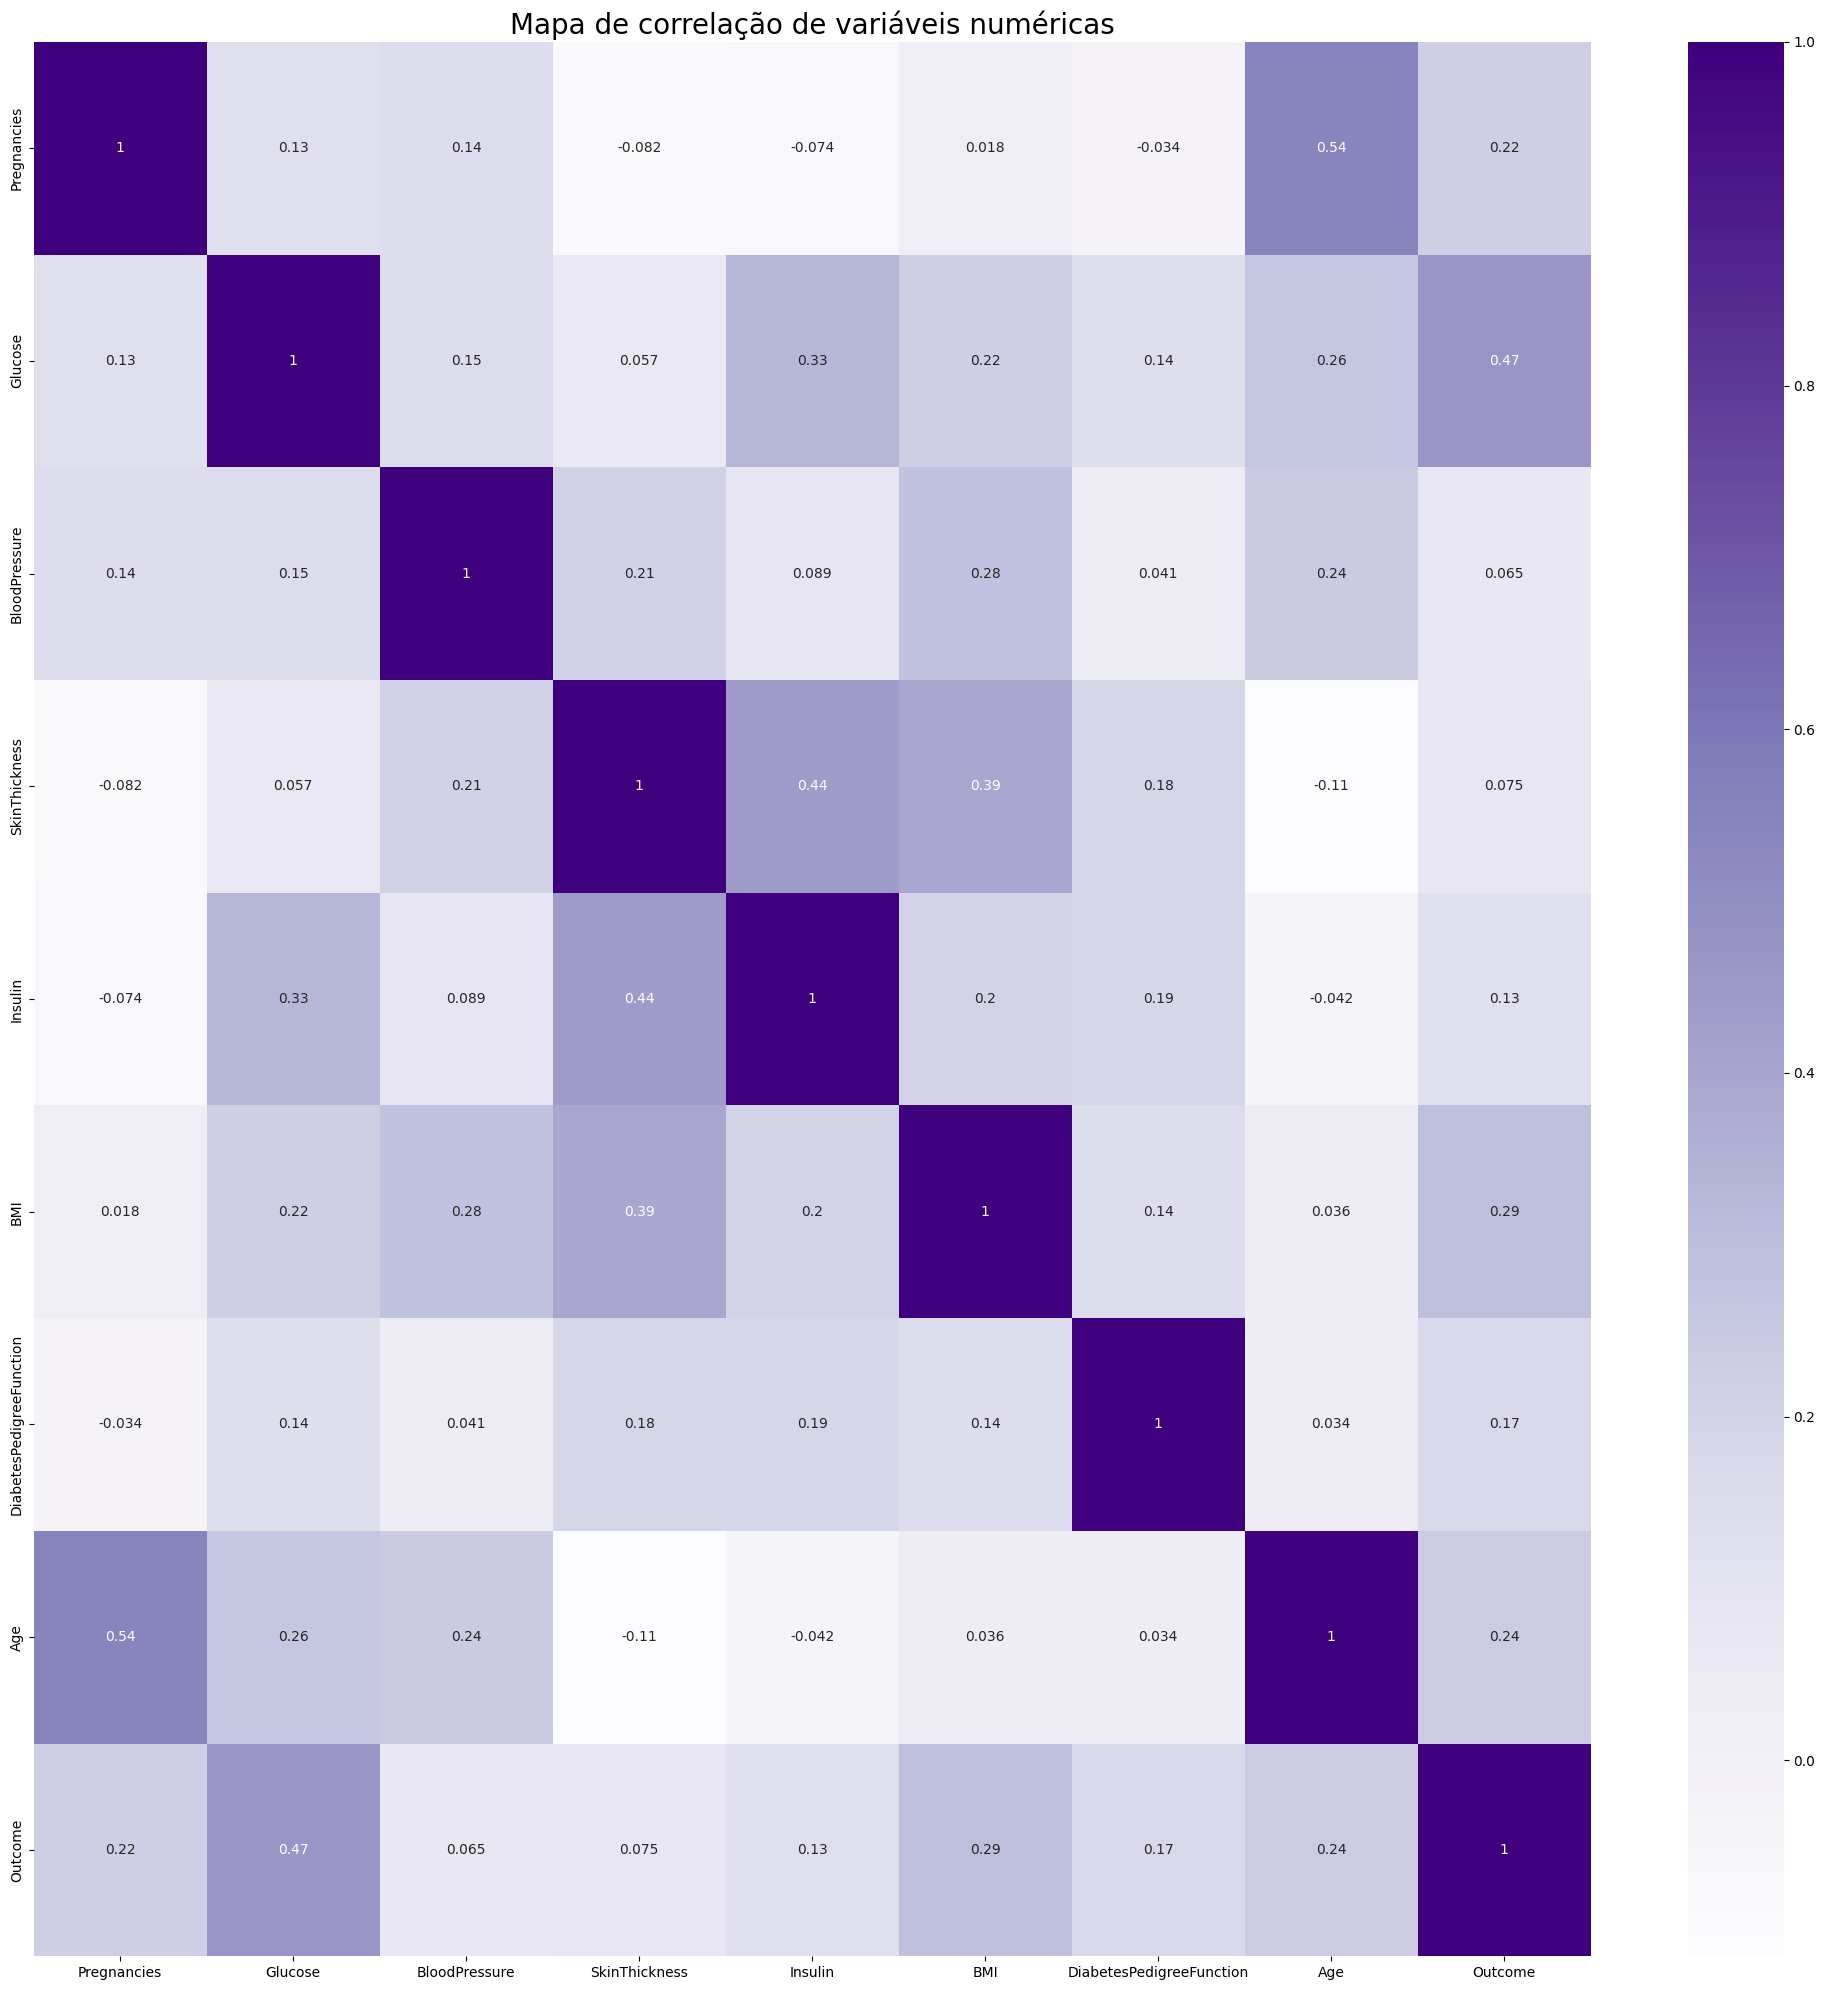

In [ ]:
# Calcula a matriz de correlação para as colunas numéricas do DataFrame.
# A correlação mede a relação linear entre duas variáveis numéricas, variando de -1 a 1.
# Um valor próximo a 1 indica uma forte correlação positiva (à medida que uma variável aumenta, a outra também aumenta).
# Um valor próximo a -1 indica uma forte correlação negativa (à medida que uma variável aumenta, a outra diminui).
# Um valor próximo a 0 indica pouca ou nenhuma correlação linear.
corr = df.select_dtypes(include=np.number).corr()

# Cria uma figura e um eixo para o heatmap com um tamanho específico.
plt.figure(figsize=(20,20))

# Gera o heatmap da matriz de correlação.
# O heatmap é uma representação visual da matriz de correlação, onde as cores representam a força e a direção da correlação entre os pares de variáveis.
# Ele é útil para identificar rapidamente quais variáveis numéricas estão fortemente correlacionadas entre si.
# 'annot=True' exibe os valores de correlação nas células do heatmap.
# 'cmap="Reds"' define o mapa de cores para o heatmap (tons de vermelho, onde cores mais escuras indicam maior correlação).
sns.heatmap(corr, annot=True, cmap="Purples")

# Define o título do heatmap.
plt.title('Mapa de correlação de variáveis numéricas', fontsize=20)

# Ajusta o layout para evitar que os rótulos se sobreponham.
plt.tight_layout()

# Exibe o plot.
plt.show()

# Insights:

# a) Correlação mais forte com 'Outcome': Glicose (0.47)
# Entre todas as variáveis, 'Glucose' apresenta a correlação mais alta com o diagnóstico de diabetes. Isso indica que níveis
# elevados de glicose estão fortemente associados à presença da doença, o que faz sentido clinicamente, já que glicemia é o principal
# indicador utilizado para diagnosticar diabetes.

# b) O IMC ('BMI') apresenta correlação positiva moderada com 'Outcome' (0.29).
# Pessoas com maior índice de massa corporal tendem a ter maior probabilidade de desenvolver diabetes tipo 2. Embora a correlação não seja tão alta
# quanto a glicose, ela é relevante, reforçando a influência do excesso de peso como fator de risco.

# c) O índice de histórico familiar ('DiabetesPedigreeFunction') possui correlação positiva de 0.17.
# Mesmo sendo uma correlação fraca, ela indica que quanto maior o valor do pedigree, maior a chance de existir predisposição genética para diabetes.

# d) A idade ('Age') tem correlação positiva com o diagnóstico (0.24).
# Isso mostra que a chance de diabetes aumenta conforme a idade avança, o que é compatível com estudos médicos que apontam maior risco após os 40 anos.

AgeGroup
20-29    396
30-39    165
40-49    118
50-59     57
60+       32
Name: count, dtype: int64


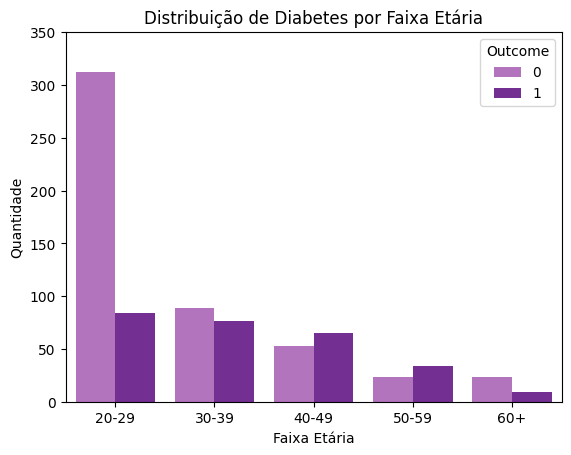

In [ ]:
# Gráfico de contagem (countplot)

# O gráfico mostra como o diabetes está distribuído entre diferentes faixas etárias.

# Na faixa 20–29:
# A grande maioria dos indivíduos não tem diabetes.
# Isso indica que, entre adultos jovens, a incidência da doença é baixa,
# o que é esperado clinicamente, já que o diabetes tipo 2 se torna mais comum com a idade.

# Na faixa 30–39:
# A quantidade de pessoas com diagnóstico aumenta quando comparado à faixa 20–29.
# Ainda é menor que a quantidade de não diabéticos, mas a diferença entre as barras
# começa a diminuir. Isso sugere um risco crescente com o passar da idade.

# Na faixa 40–49:
# A diferença entre diabéticos e não diabéticos se torna ainda menor.
# Nota-se um aumento visível da presença de diabetes nessa faixa,
# o que confirma a tendência de risco maior a partir dos 40 anos.

# Na faixa 50–59:
# A barra de diabéticos fica proporcionalmente mais alta em relação aos não diabéticos.
# A proporção já é bem mais equilibrada, indicando que o risco aumenta consideravelmente.

# Na faixa 60+:
# Embora o número total de pessoas seja menor nessa categoria,
# observa-se que a proporção de diabetes se mantém alta.
# Isso reforça que a idade avançada é um dos principais fatores de risco.

# Conclusão geral:
# O gráfico evidencia que o avanço da idade está associado ao aumento da incidência de diabetes.
# Quanto maior a faixa etária, maior é a proporção de indivíduos diagnosticados.
# Isso está alinhado com literatura médica, que aponta idade como um dos fatores
# mais relevantes para o desenvolvimento de diabetes tipo 2.

# Cria uma nova coluna chamada 'AgeGroup' a partir da coluna 'Age'.
# Aqui, os valores de idade são agrupados em faixas etárias específicas:
# 20–29, 30–39, 40–49, 50–59 e 60+.
# O parâmetro 'bins' define os limites de cada faixa,
# 'labels' define os nomes que aparecerão no gráfico,
# e 'right=False' impede sobreposição entre intervalos.
df["AgeGroup"] = pd.cut(
    df["Age"],
    bins=[20, 30, 40, 50, 60, 90],
    labels=["20-29", "30-39", "40-49", "50-59", "60+"],
    right=False
)

# Exibe a quantidade de pessoas em cada faixa etária.
# Isso permite visualizar como o dataset está distribuído antes de gerar o gráfico.
print(df["AgeGroup"].value_counts())

# Cria um gráfico de contagem (countplot) para analisar a relação entre
# faixas etárias e presença de diabetes ('Outcome').
# Cada barra representa uma faixa etária, e as cores internas mostram
# a distribuição entre pacientes com diabetes (1) e sem diabetes (0).
sns.countplot(
    data=df,
    x="AgeGroup",
    hue="Outcome",
    palette=["#ba68c8", "#7b1fa2"]
)

# Define o título do gráfico para indicar claramente o que está sendo analisado.
plt.title('Distribuição de Diabetes por Faixa Etária')

# Adiciona rótulos aos eixos para melhorar a legibilidade.
plt.xlabel('Faixa Etária')
plt.ylabel('Quantidade')

# Mais números na régua (0–500 pulando de 50)
plt.yticks(np.arange(0, 400, 50))

# Exibe o gráfico final.
plt.show()


Não diabéticos (0): 500
Diabéticos (1): 268


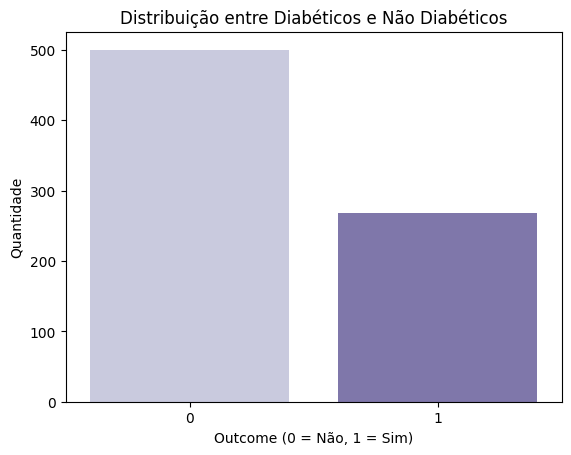

In [ ]:
# O gráfico mostra a quantidade de pessoas com e sem diabetes no dataset.
# Há 500 não diabéticos (classe 0) e 268 diabéticos (classe 1).
# Isso indica um desbalanceamento moderado, onde a classe 0 é maior que a classe 1.
# Esse tipo de distribuição é comum em dados médicos.
# Mesmo desbalanceado, o conjunto ainda possui casos suficientes da classe 1
# para treinar um modelo sem grandes problemas.

# Conta quantos são diabéticos (1) e não diabéticos (0)
outcome_count = df['Outcome'].value_counts()

# Imprime usando .loc para evitar warnings
print("Não diabéticos (0):", outcome_count.loc[0])
print("Diabéticos (1):", outcome_count.loc[1])

# Gráfico de contagem de saudáveis e doentes
# 'data=df' especifica o DataFrame a ser usado.
# 'x="Outcome"' define a coluna 'Outcome' para o eixo x.
# 'hue="Outcome"' faz com que a cor das barras seja definida pela própria categoria do Outcome.
# Isso garante que cada valor (0 e 1) tenha sua cor específica dentro da paleta.
# 'palette="Purple"' define a paleta de cores para o gráfico.
# 'legend=False' remove a legenda do gráfico, já que o eixo x já informa claramente
# quais categorias estão sendo exibidas (0 e 1), tornando a visualização mais limpa.
sns.countplot(data=df, x="Outcome",  hue="Outcome", palette="Purples", legend=False)

plt.title("Distribuição entre Diabéticos e Não Diabéticos")
plt.xlabel("Outcome (0 = Não, 1 = Sim)")
plt.ylabel("Quantidade")
plt.show()

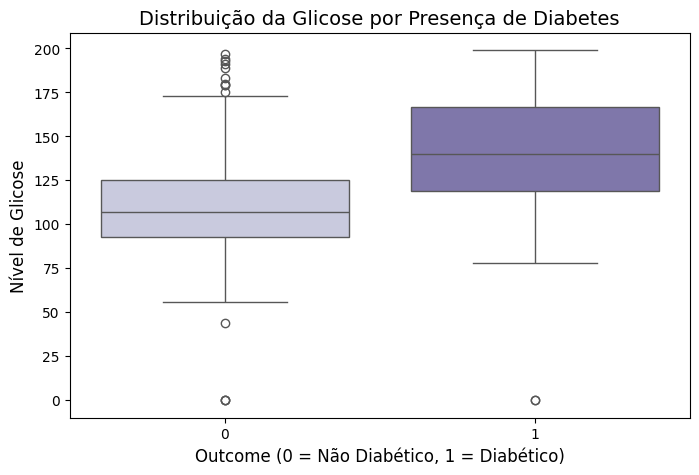

In [ ]:
# Gráfico de mediana, quartis e outliers da distribuição de glicose (box plot)

# O boxplot mostra que pessoas com diabetes (Outcome = 1) possuem níveis de glicose
# consideravelmente maiores que pessoas não diabéticas (Outcome = 0).

# A mediana do grupo diabético está bem acima da mediana do grupo não diabético,
# indicando que, em geral, níveis elevados de glicose estão fortemente associados
# ao diagnóstico de diabetes.

# Também é possível notar que o grupo diabético apresenta maior concentração de valores altos
# e um intervalo interquartil deslocado para cima, reforçando a diferença entre os grupos.

# Há alguns outliers em ambos os grupos, mas mesmo com essas exceções,
# a separação entre as distribuições é clara.

# Conclusão: níveis de glicose são um dos principais indicadores para diferenciar
# pessoas com e sem diabetes, o que é consistente com os critérios clínicos
# utilizados no diagnóstico da doença.

# Cria uma figura para deixar o tamanho do gráfico mais confortável para visualização.
plt.figure(figsize=(8,5))

# Cria um boxplot comparando a distribuição de valores de glicose ('Glucose')
# entre os grupos com e sem diabetes ('Outcome').
# 'legend=False' remove a legenda do gráfico, já que o eixo x já informa claramente
# quais categorias estão sendo exibidas (0 e 1), tornando a visualização mais limpa.
sns.boxplot(x='Outcome', y='Glucose', data=df, hue="Outcome", palette="Purples", legend=False)

# Define o título do gráfico indicando a relação analisada.
plt.title("Distribuição da Glicose por Presença de Diabetes", fontsize=14)

# Adiciona rótulos aos eixos para maior clareza.
plt.xlabel("Outcome (0 = Não Diabético, 1 = Diabético)", fontsize=12)
plt.ylabel("Nível de Glicose", fontsize=12)

# Exibe o gráfico.
plt.show()

#**Pré-Processamento dos Dados**

In [ ]:
# Pré-processamento dos Dados

# Esta seção prepara o dataset Pima Indians Diabetes para análises posteriores,
# criando novas variáveis categóricas e removendo colunas irrelevantes,
# além de organizar os dados para visualizações e futura modelagem.

# 1. Criar faixas etárias (AgeGroup):
#    Agrupa os valores da coluna 'Age' em categorias.
#    Isso facilita análises comparativas entre faixas etárias.
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[20, 30, 40, 50, 60, 90],
    labels=["20-29", "30-39", "40-49", "50-59", "60+"],
    right=False
)

# 2. Criar categorias de glicose (GlucoseCat):
#    Transforma a variável contínua 'Glucose' em faixas clínicas:
#    - Normal: menos de 100 mg/dL
#    - Pré-diabetes: 100–139 mg/dL
#    - Alta: 140+ (indicador importante para diabetes)
df['GlucoseCat'] = pd.cut(
    df['Glucose'],
    bins=[0, 99, 125, 300],  # limites clínicos
    labels=["Normal", "Pré-diabetes", "Diabetes"]
)

# 3. Criar categorias de IMC (BMICat):
#    Classifica o IMC segundo categorias amplamente utilizadas em saúde:
#    - Abaixo do peso, Normal, Sobrepeso e Obesidade.
#    Isso facilita visualizações comparativas e análises de risco.
df['BMICat'] = pd.cut(
    df['BMI'],
    bins=[0, 18.5, 25, 30, 70],
    labels=["Abaixo do normal", "Normal", "Sobrepeso", "Obesidade"]
)

# 4. Criar categorias para histórico familiar (PedigreeCat):
#    A variável 'DiabetesPedigree' mede risco familiar.
#    Aqui ela é dividida em níveis qualitativos para facilitar análises.
df['PedigreeCat'] = pd.cut(
    df['DiabetesPedigreeFunction'],
    bins=[0, 0.5, 1.0, 2.5],
    labels=["Baixo", "Moderado", "Alto"]
)

# 5. Remover colunas que não serão utilizadas:
#    No dataset Pima, todas as colunas são úteis, e não há duplicadas,
#    então normalmente nenhum campo é removido.
#    Mesmo assim, deixamos essa etapa estruturada pcom exemplo:
# df.drop(columns=['SkinThickness'], inplace=True)

# 6. Exibir as colunas restantes:
#    Confirma as variáveis disponíveis após a criação das categorias.
print("Variáveis disponíveis após pré-processamento:", df.columns.tolist())

df.head(20)

Variáveis disponíveis após pré-processamento: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'AgeGroup', 'GlucoseCat', 'BMICat', 'PedigreeCat']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeGroup,GlucoseCat,BMICat,PedigreeCat
0,6,148,72,35,0,33.6,0.627,50,1,50-59,Diabetes,Obesidade,Moderado
1,1,85,66,29,0,26.6,0.351,31,0,30-39,Normal,Sobrepeso,Baixo
2,8,183,64,0,0,23.3,0.672,32,1,30-39,Diabetes,Normal,Moderado
3,1,89,66,23,94,28.1,0.167,21,0,20-29,Normal,Sobrepeso,Baixo
4,0,137,40,35,168,43.1,2.288,33,1,30-39,Diabetes,Obesidade,Alto
5,5,116,74,0,0,25.6,0.201,30,0,30-39,Pré-diabetes,Sobrepeso,Baixo
6,3,78,50,32,88,31.0,0.248,26,1,20-29,Normal,Obesidade,Baixo
7,10,115,0,0,0,35.3,0.134,29,0,20-29,Pré-diabetes,Obesidade,Baixo
8,2,197,70,45,543,30.5,0.158,53,1,50-59,Diabetes,Obesidade,Baixo
9,8,125,96,0,0,0.0,0.232,54,1,50-59,Pré-diabetes,NaN,Baixo


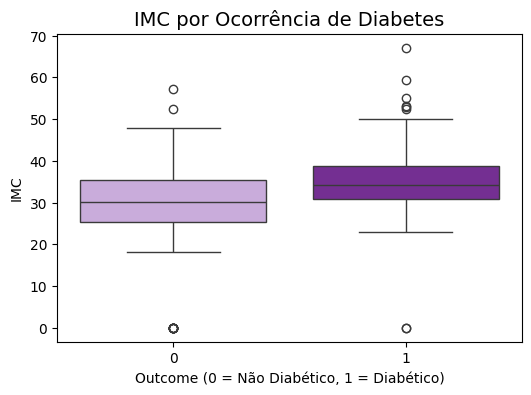

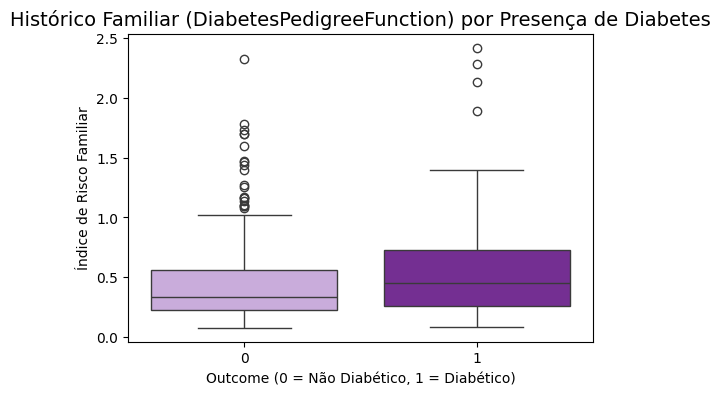

In [ ]:
# IMC por Ocorrência de Diabetes

# O primeiro boxplot compara a distribuição do IMC (BMI) entre pessoas não diabéticas (Outcome = 0)
# e pessoas diabéticas (Outcome = 1).

# Mediana mais alta no grupo diabético:
# A linha central da caixa (mediana) no grupo diabético está mais acima,
# indicando que, em média, pessoas com diabetes têm IMC mais elevado.

# Caixa (Q1–Q3) deslocada para cima:
# A caixa inteira do grupo diabético está mais alta, mostrando que a maior parte dos diabéticos
# tem IMC acima de 30 (sobrepeso ou obesidade), enquanto muitos não diabéticos ficam entre 25 e 30.
#
# Outliers mais altos no grupo diabético:
# Existem vários valores extremos acima de 50 e até perto de 60, indicando casos de obesidade severa,
# mais frequentes entre diabéticos.
#
# Conclusão (IMC):
# O gráfico mostra que quanto maior o IMC, maior a chance de diabetes.
# O IMC elevado aparece como um dos fatores mais fortes associados ao desfecho.

plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x='Outcome',
    y='BMI',
    hue='Outcome',
    palette=["#cba4e3", "#7b1fa2"],
    legend=False
)
plt.title("IMC por Ocorrência de Diabetes", fontsize=14)
plt.xlabel("Outcome (0 = Não Diabético, 1 = Diabético)")
plt.ylabel("IMC")
plt.show()

# Histórico Familiar (DiabetesPedigreeFunction) por Presença de Diabetes

# O segundo boxplot compara o índice de risco familiar DiabetesPedigreeFunction,
# que mede a predisposição genética à doença.

# Mediana levemente maior no grupo diabético:
# A mediana dos diabéticos está um pouco acima da dos não diabéticos,
# indicando risco familiar um pouco maior entre quem tem diabetes.

# Distribuição mais ampla no grupo diabético:
# O grupo diabético apresenta maior variação nos valores e mais indivíduos com risco
# familiar moderado e alto.

# Mais outliers entre os diabéticos:
# Há vários valores extremos acima de 1.5 e até próximo de 2.5, representando pessoas
# com histórico familiar muito forte, mais presentes no grupo diabético.

# Conclusão (Histórico Familiar):
# O histórico familiar influencia o risco de diabetes, mas de forma mais moderada.
# Ele ajuda a explicar alguns casos, principalmente os mais extremos,
# mas não determina sozinho quem terá a doença.

# Resumo geral:
# IMC é o indicador mais forte, pois diabéticos apresentam IMC consistentemente maior.
# O histórico familiar também influencia, mas com menor intensidade.
# Os dois boxplots mostram que o diabetes no dataset é resultado da combinação entre fatores
# metabólicos (como IMC) e fatores genéticos (como DiabetesPedigreeFunction).

plt.figure(figsize=(6,4))
sns.boxplot(
    data=df,
    x='Outcome',
    y='DiabetesPedigreeFunction',
    hue='Outcome',
    palette=["#cba4e3", "#7b1fa2"],
    legend=False
)
plt.title("Histórico Familiar (DiabetesPedigreeFunction) por Presença de Diabetes", fontsize=14)
plt.xlabel("Outcome (0 = Não Diabético, 1 = Diabético)")
plt.ylabel("Índice de Risco Familiar")
plt.show()


# **Pipeline - Regressão Logística (Supervisionado)**

In [ ]:
# Definição da variável alvo (y) e das variáveis preditoras (X)

# 'Outcome' é a coluna que indica se a paciente tem diabetes (1) ou não (0).
y = df['Outcome']

# X recebe todas as demais variáveis do dataset, removendo a coluna alvo.
X = df.drop(columns=['Outcome'])

X.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,AgeGroup,GlucoseCat,BMICat,PedigreeCat
0,6,148,72,35,0,33.6,0.627,50,50-59,Diabetes,Obesidade,Moderado
1,1,85,66,29,0,26.6,0.351,31,30-39,Normal,Sobrepeso,Baixo
2,8,183,64,0,0,23.3,0.672,32,30-39,Diabetes,Normal,Moderado
3,1,89,66,23,94,28.1,0.167,21,20-29,Normal,Sobrepeso,Baixo
4,0,137,40,35,168,43.1,2.288,33,30-39,Diabetes,Obesidade,Alto


In [ ]:
# Separar os tipos de variáveis para o pré-processamento

num_cols = X.select_dtypes(include=np.number).columns.tolist()
cat_cols = X.select_dtypes(exclude=np.number).columns.tolist()

print("Variáveis Numéricas:", num_cols)
print("Variáveis Categóricas:", cat_cols)


Variáveis Numéricas: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
Variáveis Categóricas: ['AgeGroup', 'GlucoseCat', 'BMICat', 'PedigreeCat']


In [ ]:
# Pipeline: Normalização das numéricas + One-Hot Encoding das categóricas

# O ColumnTransformer cria o pré-processamento:
#   - num: aplica StandardScaler nas variáveis numéricas (normalizar coloca todas as variáveis na mesma escala)
#   - cat: aplica OneHotEncoder nas variáveis categóricas (variável categórica é transformada em várias colunas binárias)
# Isso garante que o modelo receba apenas números e que os dados estejam na mesma escala.

# O Pipeline combina:
#   (1) o pré-processamento (prep)
#   (2) a Regressão Logística (clf)
# Isso facilita o treino, teste e análise do modelo em apenas um objeto.

# Pré-processamento: numéricas → StandardScaler | categóricas → OneHotEncoder
preprocess = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# Modelo completo usando Regressão Logística
modelo = Pipeline(steps=[
    ('prep', preprocess),
    ('clf', LogisticRegression(max_iter=1000, class_weight='balanced'))
])

              precision    recall  f1-score   support

           0       0.88      0.77      0.82       100
           1       0.65      0.80      0.72        54

    accuracy                           0.78       154
   macro avg       0.76      0.78      0.77       154
weighted avg       0.80      0.78      0.78       154



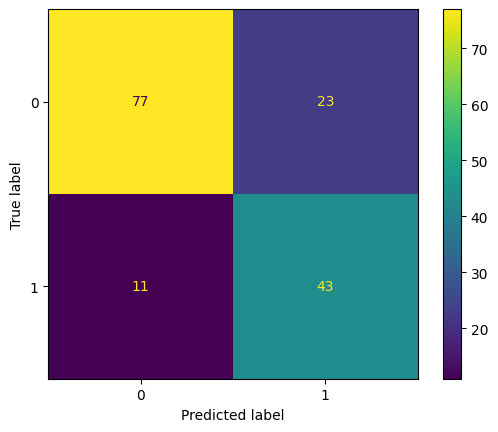

ROC-AUC: 0.842


In [ ]:
# Treino do modelo + Previsões + Métricas iniciais

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

modelo.fit(X_train, y_train)

y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()

roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC:", round(roc_auc, 3))


In [ ]:
# Importância de cada variável (coeficientes da Regressão Logística)

# Extrair nomes das features após o pré-processamento
# 'prep' é o nome dado ao ColumnTransformer dentro do Pipeline.
# 'get_feature_names_out()' retorna os nomes das colunas após o OneHotEncoder e StandardScaler.
feature_names = modelo.named_steps['prep'].get_feature_names_out()

# Extrair coeficientes da classe positiva
# 'clf' é o nome dado ao LogisticRegression dentro do Pipeline.
# 'coef_[0]' acessa os coeficientes para a classe positiva (neste caso, 'Outcome' = 1).
coefs = modelo.named_steps['clf'].coef_[0]

# Criar tabela de pesos
# Os coeficientes indicam a importância e a direção da relação de cada feature com a variável alvo.
# Ordenar os resultados pelos coeficientes em ordem decrescente para ver as features mais influentes primeiro.
pesos = pd.DataFrame({'Feature': feature_names, 'Coef': coefs}).sort_values('Coef', ascending=False)

# Mostrar as 10 mais influentes
pesos.head(10)

,Feature,Coef
16,cat__GlucoseCat_nan,1.645076
1,num__Glucose,0.991767
21,cat__BMICat_nan,0.983504
10,cat__AgeGroup_40-49,0.643396
11,cat__AgeGroup_50-59,0.560431
5,num__BMI,0.510093
24,cat__PedigreeCat_Moderado,0.285830
19,cat__BMICat_Obesidade,0.229568
0,num__Pregnancies,0.177022
22,cat__PedigreeCat_Alto,0.114568


In [ ]:
# Diagnóstico de generalização do modelo
# O modelo apresentou acurácia de 0.78 tanto no treino quanto no teste,
# mostrando que está generalizando bem e não sofreu overfitting ou underfitting.
# Para um modelo simples como a Regressão Logística, usando o dataset Pima Diabetes,
# esse nível de desempenho é considerado bom, especialmente porque o dataset é pequeno
# e contém variáveis clínicas difíceis de modelar linearmente.

acc_treino = accuracy_score(y_train, modelo.predict(X_train))
acc_teste = accuracy_score(y_test, y_pred)

print("\n📈 Diagnóstico de Generalização:")
print(f"Acurácia no Treino: {acc_treino:.2f}")
print(f"Acurácia no Teste:  {acc_teste:.2f}")

if acc_treino - acc_teste > 0.2:
    print("Possível overfitting (memoriza treino, erra teste)")
elif acc_teste < 0.7:
    print("Possível underfitting (modelo fraco)")
else:
    print("Modelo generalizando bem! 🎯")



📈 Diagnóstico de Generalização:
Acurácia no Treino: 0.78
Acurácia no Teste:  0.78
Modelo generalizando bem! 🎯
